Загрузите датасет breast_cancer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.
Разделите датасет на обучающую и тестовую выборки в пропорции 80-20

In [ ]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y)

Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели

In [ ]:
clf = SVC(C=0.01)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.6807511737089202
0.6643356643356644


Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):

-собрать больше объектов наблюдения;

-провести обучение на меньшем объеме данных;

-исключить часть признаков из модели;

-добавить новые признаки в модель;

-добавить полиномиальные признаки;

-попробовать более сложные модели;

-попробовать более простые модели;

-увеличить регуляризацию модели;

-уменьшить регуляризацию модели;

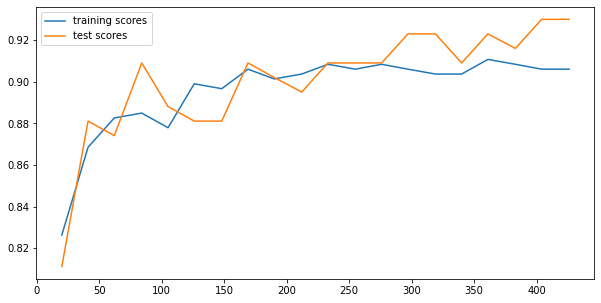

In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 20):
    clf = SVC(C=10, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

На данном графике видно что зависимость между тестовой и обучающей точности достаточно близка, следовательно мы можем понять что наша модель недообучается. Для улучшения точности модели следует использовать более сложные модели и уменьшить регулизацию. 

Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод


In [ ]:
clf = SVC(kernel = 'poly')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8990610328638498
0.916083916083916


Тестовая точность увеличилась путём построения более сложной модели

Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

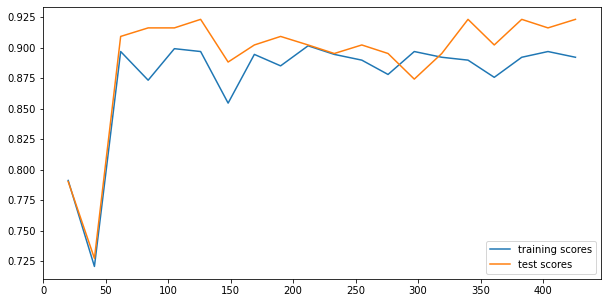

In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 20):
    clf = SVC(C=1000000, kernel='poly')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели

ValueError: ignored

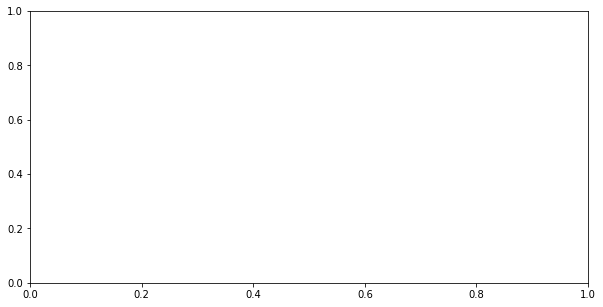

In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 20):
    clf = SVC(C=20, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(20, training_scores, label="training scores")
plt.plot(20, test_scores, label="test scores")
plt.legend(loc="best")

Найдите методом подбора оптимальное значение параметра регуляризации (примерное)

C = 0.1

Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.

In [ ]:
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8873239436619719
0.9020979020979021


Повторите такой же анализ для полиномиального ядра и степени полинома как гиперпараметра. Прокомментируйте кривые обучения для случаев недо-и переобучения.

In [ ]:
clf = SVC(kernel = 'poly', degree = 5)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.903755868544601
0.9090909090909091


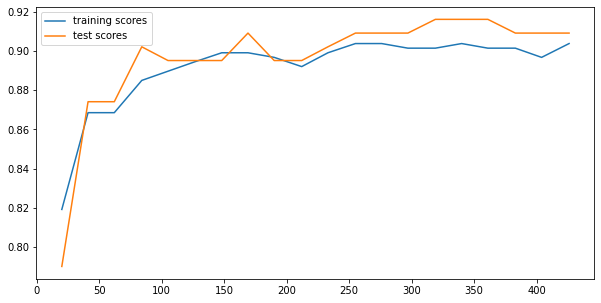

In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 20):
    clf = SVC(C=20, kernel='poly', degree = 2)
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Исследуйте зависимость степени обученности модели от значения других гиперпараметров различных классификаторов, реализованных в sklearn. Постройте кривые обучения в зависимости от значения этих параметров.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
%%time

model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_pred

CPU times: user 12.4 ms, sys: 0 ns, total: 12.4 ms
Wall time: 29.9 ms


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

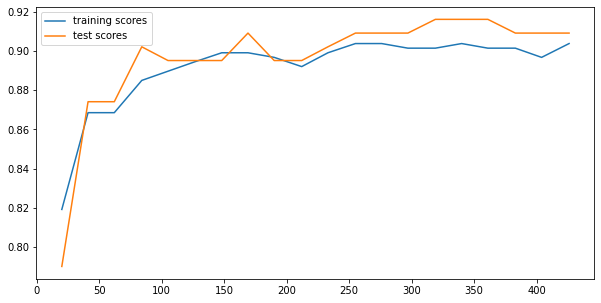

In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 20):
    model1 = KNeighborsClassifier(n_neighbors=4)
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Повторите данное исследование на полном датасете. Сделайте выводы об оптимальной регуляризации моделей.

In [ ]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

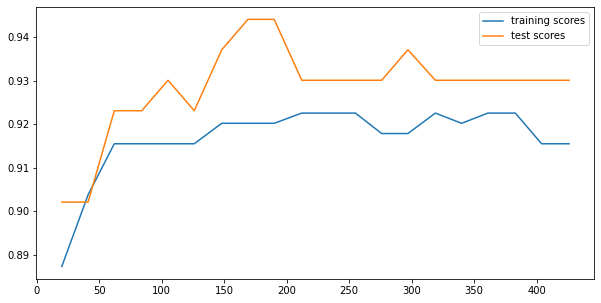

In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 20):
    model1 = KNeighborsClassifier(n_neighbors=4)
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Повторите данное исследование на другом датасете. Предпочтительно выбирать более объемный набор данных для классификации (несколько тысяч примеров на каждый класс).

Напишите функцию, которая автоматизирует процесс подбора гиперпараметров данной модели путем проверки ошибок на тестовой выборке моделей с разными значениями гиперпараметра. Сравните вашу реализацию с функцией GridSearch.